In [79]:
import pandas as pd
datos_sin_procesar = pd.read_csv("H:\dashboards\credicoop_dashboard_env\Credicoop_dashboard\datasets\mov2.CSV",sep=";")

In [69]:
import datetime as dt

In [80]:
datos_sin_procesar.FECHA=pd.to_datetime(datos_sin_procesar['FECHA'], format='%Y%m%d')

In [81]:
datos_sin_procesar["ano"]=datos_sin_procesar.FECHA.dt.year
datos_sin_procesar["mes"]=datos_sin_procesar.FECHA.dt.month

In [82]:
datos_sin_procesar.FECHA

0      2021-12-09
1      2021-12-09
2      2021-12-09
3      2021-12-07
4      2021-12-07
          ...    
1393   2018-05-02
1394   2018-05-02
1395   2018-05-02
1396   2018-05-02
1397   2018-05-02
Name: FECHA, Length: 1398, dtype: datetime64[ns]

In [56]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [83]:
datos_sin_procesar=datos_sin_procesar[datos_sin_procesar.DESCRIPCION=="Acreditacion de Sueldos "]

In [97]:
columnas = [ 'CREDITO']
for columna in columnas:
    datos_sin_procesar[columna] = datos_sin_procesar[columna].str.replace('.', '', regex=True)
    datos_sin_procesar[columna] = datos_sin_procesar[columna].str.replace(',', '.', regex=True)
    datos_sin_procesar[columna] = datos_sin_procesar[columna].astype(float)

In [105]:
datosagru=datos_sin_procesar.groupby(["ano",'mes'])['CREDITO'].sum().reset_index()

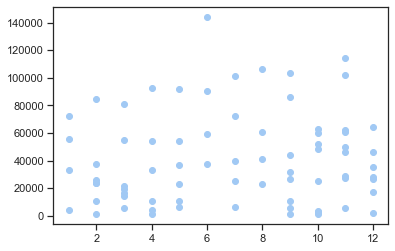

In [115]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.scatter(list(datos_sin_procesar.mes.values), list(datos_sin_procesar.CREDITO.values));

<AxesSubplot:xlabel='mes', ylabel='CREDITO'>

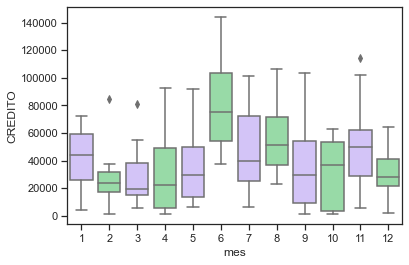

In [117]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
#tips = sns.load_dataset(datosagru)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="mes", y="CREDITO",
             palette=["m", "g"],
            data=datos_sin_procesar)
